In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df_train = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/train.csv")
df_test = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/test.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/train.csv'

In [ ]:
df_train.head()

,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F25,F26,F27,F28,F29,F30,F31,F32,F33,relationship_probability
0,1,20.745071,165.762403,56.858063,1,CSE,7.217522,Low passion,UP,No drop,...,1.953189,1193.921301,47.847497,4,6.303039,8,8.128441,6.432328,21.160995,39.515062
1,2,19.792604,165.465859,61.334006,0,ECE,6.231328,Moderate,Rajasthan,No drop,...,10.554861,148.027235,134.785392,3,20.644393,7,8.095341,4.157341,15.717813,17.006475
2,3,20.971533,152.043568,57.831427,5,CSE,8.564549,Moderate,HP,No drop,...,8.078263,638.910110,27.091241,3,9.663469,8,4.763444,3.000000,14.936667,33.432852
3,4,22.284545,166.699098,66.325017,2,BIOTECH,9.094491,Moderate,Haryana,No drop,...,6.630663,6396.098878,75.168180,4,8.619273,11,1.830501,5.967123,16.022362,43.225346
4,5,19.648770,177.328291,79.366142,4,CSE,7.843307,Moderate,Delhi,Single drop,...,5.218199,877.959471,90.897041,2,6.931472,11,3.088386,5.288002,5.750013,24.569516


In [ ]:
df_test.head()

,ID,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33
0,1,18.201783,158.671399,73.174444,3,IT,5.891382,Highly passionate,Rajasthan,No drop,...,6.098754,8.002726,7406.916273,173.013799,4,2.376448,13,2.914661,6.818123,15.066710
1,2,18.876303,163.404413,52.919237,3,ME,2.499526,Moderate,Punjab,No drop,...,10.258205,9.247447,313.683154,199.209939,5,7.510538,7,8.730423,4.424803,19.290488
2,3,18.908152,174.162455,75.972494,3,CSE,1.494057,Moderate,Haryana,No drop,...,10.624413,9.588878,203.110396,136.717068,5,10.938223,5,5.343857,5.632180,3.804402
3,4,19.021908,169.361626,64.644557,0,BIOTECH,8.397408,Moderate,Haryana,Single drop,...,7.816057,1.369854,277.552521,63.044365,2,5.451053,7,0.997402,8.255655,30.645315
4,5,18.993137,181.486308,46.353628,4,ME,6.780643,Low passion,Rajasthan,No drop,...,7.181496,8.559309,4584.446916,212.136726,5,0.708583,9,2.295394,7.923949,6.521921


In [ ]:
print(f"The size of dataset(train.csv) is : {df_train.shape}")

The size of dataset(train.csv) is : (5000, 35)


In [ ]:
print(f"The size of dataset(test.csv) is: {df_test.shape}")

The size of dataset(test.csv) is: (2000, 34)


In [ ]:
print(f"The description of dataset is: {df_train.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        5000 non-null   int64  
 1   F1                        5000 non-null   float64
 2   F2                        5000 non-null   float64
 3   F3                        5000 non-null   float64
 4   F4                        5000 non-null   int64  
 5   F5                        5000 non-null   object 
 6   F6                        5000 non-null   float64
 7   F7                        5000 non-null   object 
 8   F8                        5000 non-null   object 
 9   F9                        5000 non-null   object 
 10  F10                       5000 non-null   object 
 11  F11                       5000 non-null   int64  
 12  F12                       5000 non-null   int64  
 13  F13                       5000 non-null   object 
 14  F14     

In [ ]:
df_train.isnull().sum()

ID                          0
F1                          0
F2                          0
F3                          0
F4                          0
F5                          0
F6                          0
F7                          0
F8                          0
F9                          0
F10                         0
F11                         0
F12                         0
F13                         0
F14                         0
F15                         0
F16                         0
F17                         0
F18                         0
F19                         0
F20                         0
F21                         0
F22                         0
F23                         0
F24                         0
F25                         0
F26                         0
F27                         0
F28                         0
F29                         0
F30                         0
F31                         0
F32                         0
F33       

In [ ]:
df_train.describe()

,ID,F1,F2,F3,F4,F6,F11,F12,F14,F15,...,F25,F26,F27,F28,F29,F30,F31,F32,F33,relationship_probability
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,20.069409,169.896023,65.350047,2.210200,6.013532,1.546800,2.014600,5.019124,5.581221,...,10.119129,1241.838768,99.557579,5.036600,8.432503,7.943200,5.003631,6.478316,10.122016,27.636963
std,1443.520003,1.370304,9.676560,11.380760,1.995999,2.432011,1.215774,1.403845,2.250827,2.120990,...,4.778975,3049.514051,44.958735,2.225815,5.181308,2.833581,2.254476,1.505645,7.129794,9.102283
min,1.000000,18.000000,150.000000,45.000000,0.000000,0.000378,0.000000,0.000000,0.060629,0.239452,...,0.005361,100.000000,10.000000,0.000000,0.000499,0.000000,0.075354,3.000000,0.035131,0.000000
25%,1250.750000,19.013142,163.134171,57.069364,0.000000,4.291567,1.000000,1.000000,3.255320,4.021639,...,6.748125,141.420772,66.964171,3.000000,4.310346,6.000000,3.280964,5.464776,4.944427,21.424339
50%,2500.500000,20.020198,169.825495,65.119009,2.000000,6.017811,1.000000,2.000000,5.033012,5.680879,...,10.011338,393.279129,93.133296,5.000000,7.999010,8.000000,5.005904,6.496200,8.639665,27.255910
75%,3750.250000,20.999016,176.772381,73.106411,4.000000,7.662042,2.000000,3.000000,6.774091,7.257919,...,13.349725,1106.666654,124.841324,6.000000,11.918633,10.000000,6.734422,7.491842,13.513056,33.490723
max,5000.000000,24.000000,190.000000,95.000000,7.000000,14.000000,5.000000,6.000000,9.920928,9.958463,...,27.395359,50000.000000,316.806947,15.000000,35.700358,20.000000,9.912214,11.848761,62.277423,62.085653


In [ ]:
df_features = pd.read_csv("/kaggle/input/gdgc-ai-ml-inductions-batch-2025-26/feature_lookup.csv")

In [ ]:
df_features.head()

,feature_code,relevance,type
0,F1,age,numeric
1,F2,height,numeric
2,F3,weight,numeric
3,F4,gym_frequency,categorical
4,F5,branch,categorical


In [ ]:
df_numeric = df_features[df_features['type']=='numeric']
df_categorical = df_features[df_features['type']=='categorical']

In [ ]:
df_numeric.head()

,feature_code,relevance,type
0,F1,age,numeric
1,F2,height,numeric
2,F3,weight,numeric
5,F6,study_hours,numeric
13,F14,social_habits,numeric


In [ ]:
df_categorical.head()


,feature_code,relevance,type
3,F4,gym_frequency,categorical
4,F5,branch,categorical
6,F7,passion_drive,categorical
7,F8,home_state,categorical
8,F9,dropper_status,categorical


In [ ]:
numeric_cols = df_numeric['relevance'].tolist()
categorical_cols = df_categorical['relevance'].tolist()
print(f"The numeric columns are: {numeric_cols}\n")
print(f"The categorical columns are: {categorical_cols}\n")

The numeric columns are: ['age', 'height', 'weight', 'study_hours', 'social_habits', 'communication_skills', 'public_speaking', 'popularity', 'approachability', 'availability', 'ego_score', 'stress_level', 'beard_length', 'shoe_size', 'netflix_hours', 'instagram_followers', 'playlist_count', 'gaming_hours', 'room_cleanliness', 'sleep_hours', 'anime_count']

The categorical columns are: ['gym_frequency', 'branch', 'passion_drive', 'home_state', 'dropper_status', 'school_board', 'num_sports', 'clubs_joined', 'personality', 'coffee_cups_daily', 'memes_shared', 'food_orders']



In [ ]:
print(f"The number of numeric columns are : {len(numeric_cols)}")
print(f"The number of categorical columns are : {len(categorical_cols)}")

The number of numeric columns are : 21
The number of categorical columns are : 12


In [ ]:
df_train['relationship_probability'].describe()

count    5000.000000
mean       27.636963
std         9.102283
min         0.000000
25%        21.424339
50%        27.255910
75%        33.490723
max        62.085653
Name: relationship_probability, dtype: float64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


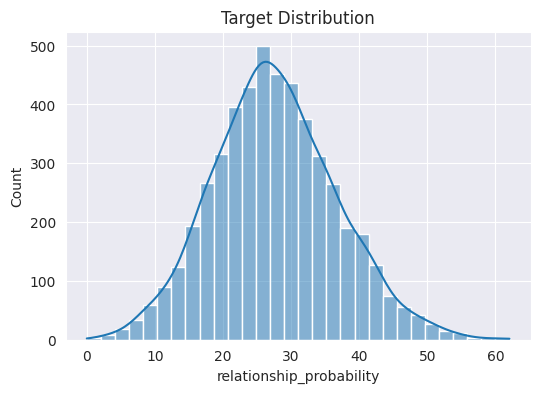

In [ ]:
plt.figure(figsize = (6,4))
sns.histplot(df_train['relationship_probability'] , bins =30 , kde = True)
plt.title("Target Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


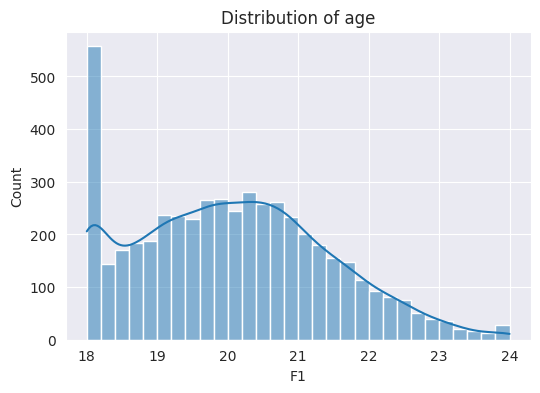

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


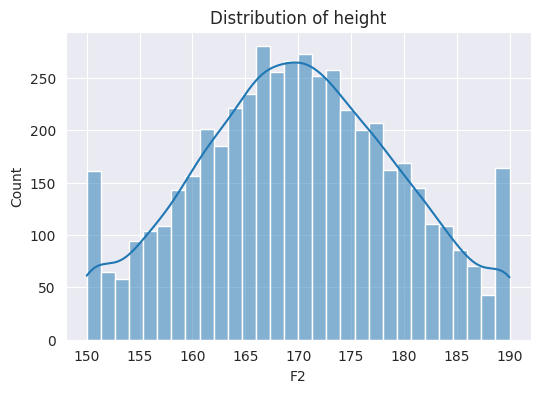

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


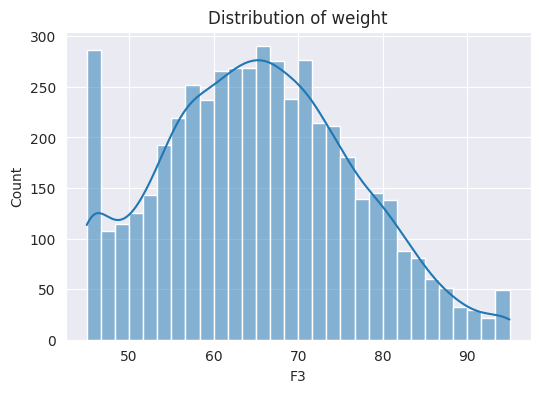

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


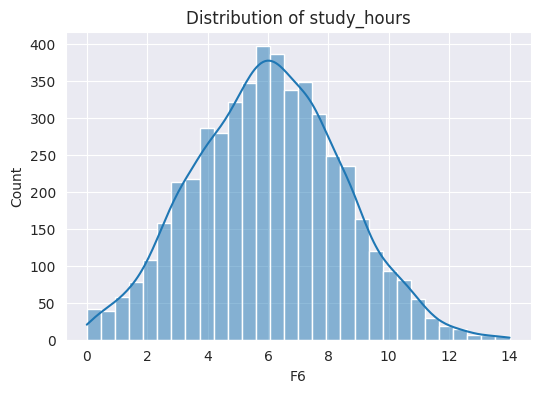

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


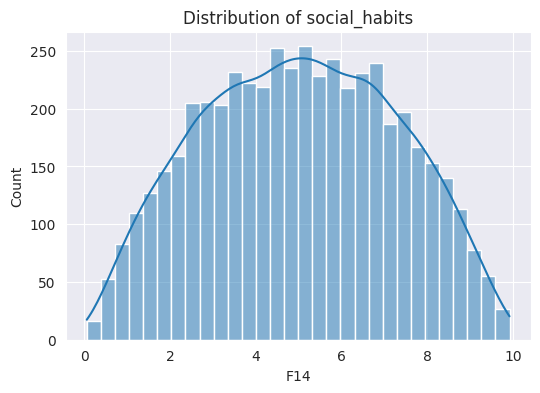

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


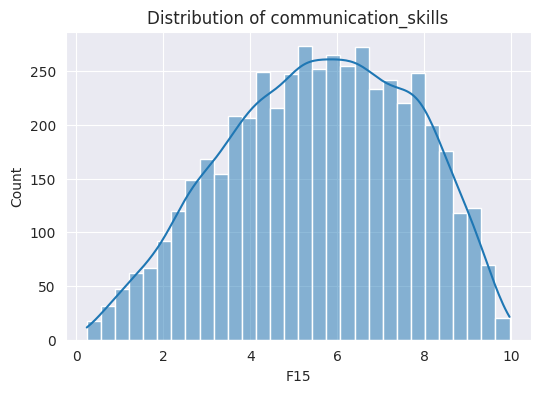

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


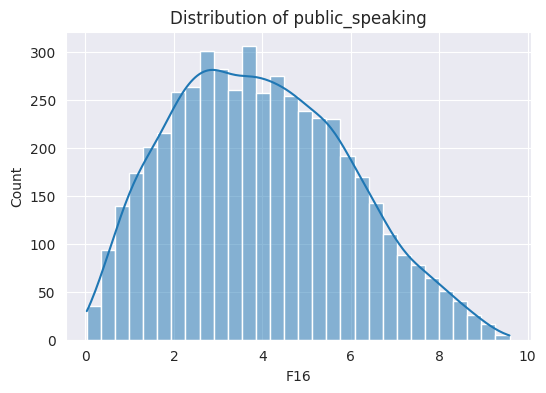

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


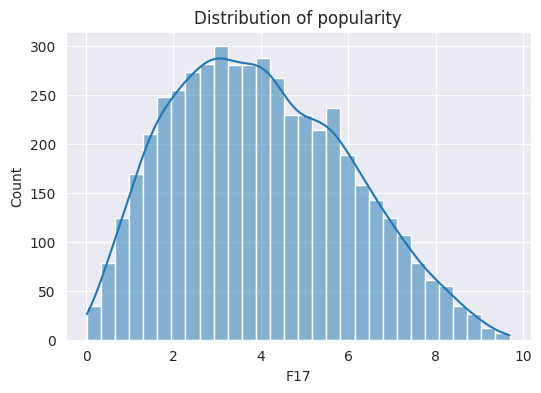

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


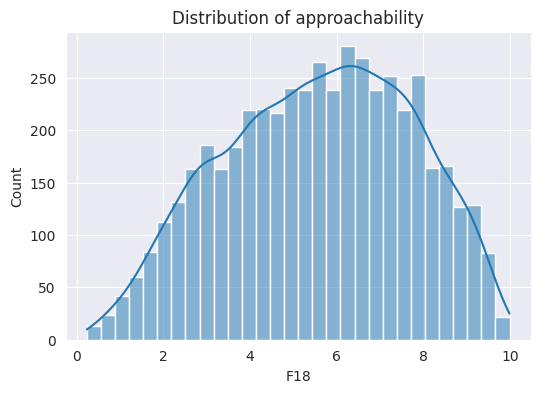

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


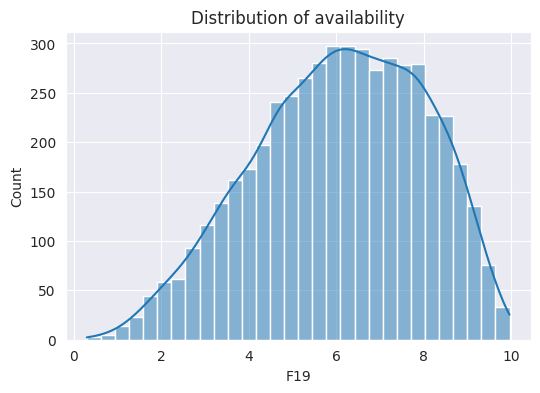

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


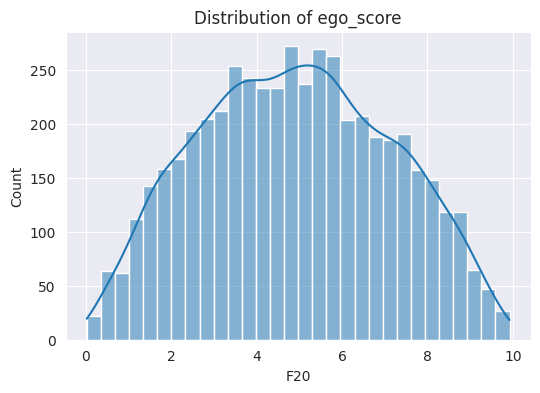

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


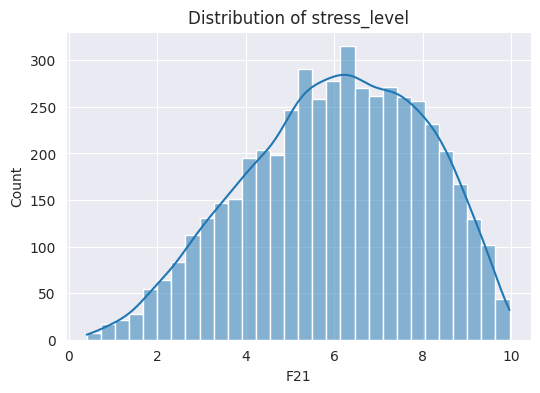

In [ ]:
feature_cols = df_numeric['feature_code'].tolist()
feature_map = dict(zip(df_features['feature_code'], df_features['relevance']))
 
for col in feature_cols[:12]: 
    real_name = feature_map[col] 
    plt.figure(figsize=(6,4))
    sns.histplot(df_train[col], bins=30, kde=True)
    plt.title(f"Distribution of {real_name}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


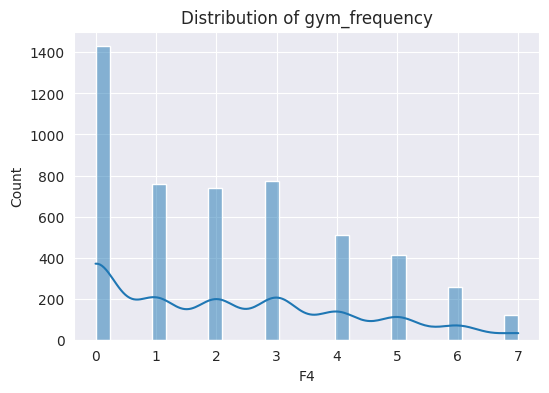

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


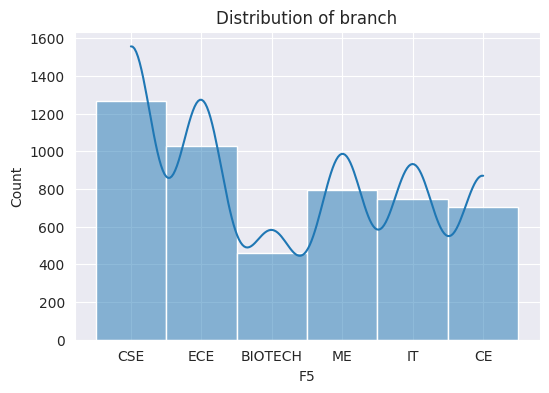

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


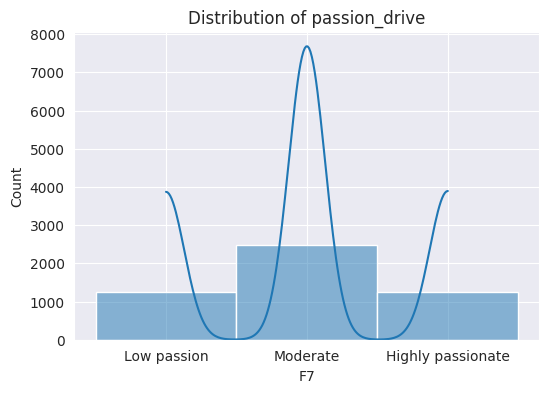

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


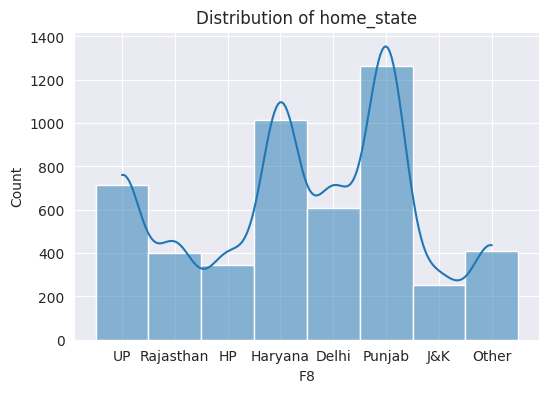

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


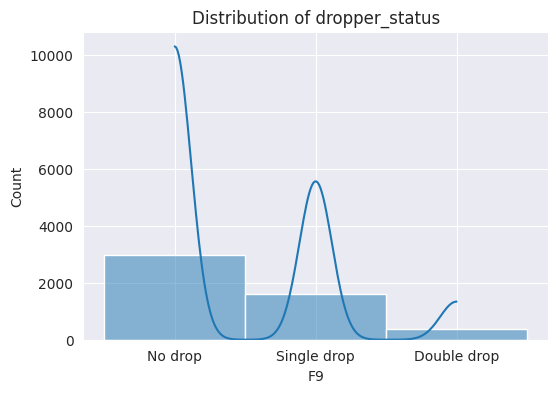

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


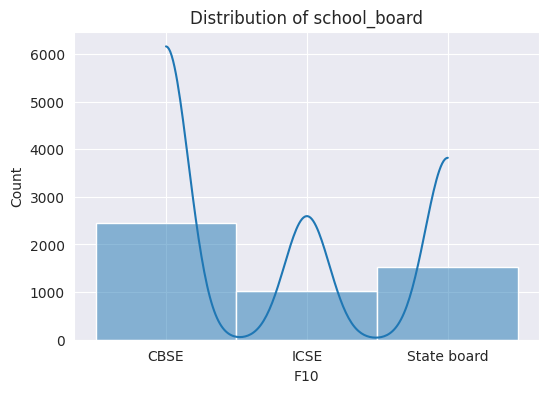

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


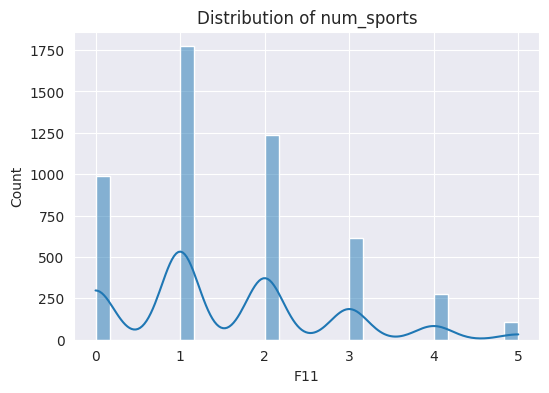

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


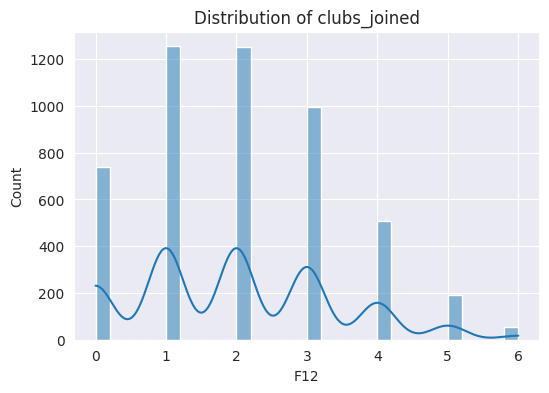

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


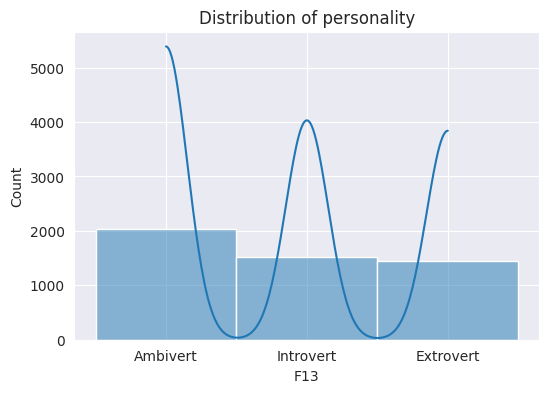

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


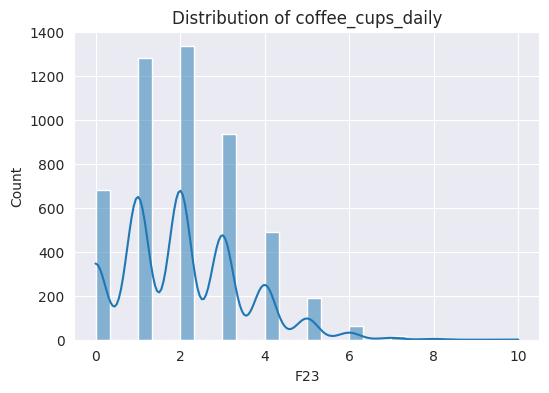

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


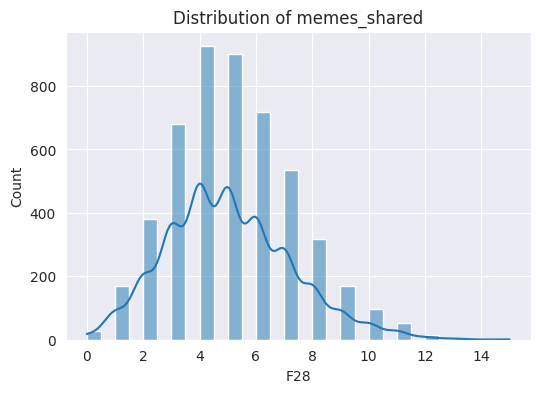

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


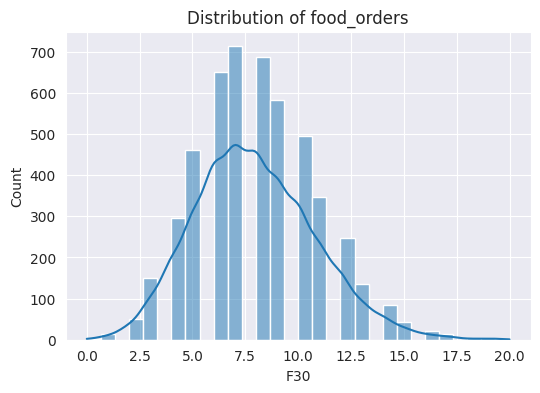

In [ ]:
feature_cols = df_categorical['feature_code'].tolist()
feature_map = dict(zip(df_features['feature_code'], df_features['relevance']))
for col in feature_cols[:12]: 
    real_name = feature_map[col] 
    plt.figure(figsize=(6,4))
    sns.histplot(df_train[col], bins=30, kde=True)
    plt.title(f"Distribution of {real_name}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [ ]:
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'ID' in numeric_cols:
    numeric_cols.remove('ID')
corr = df_train[numeric_cols + ['relationship_probability']].corr()
corr.head()




,F1,F2,F3,F4,F6,F11,F12,F14,F15,F16,...,F26,F27,F28,F29,F30,F31,F32,F33,relationship_probability,relationship_probability
F1,1.000000,-0.005753,-0.000757,-0.009261,-0.016897,-0.016396,-0.007191,-0.016855,-0.012538,0.031060,...,-0.003571,0.001205,-0.002522,0.004048,-0.023858,0.005191,-0.004813,-0.017487,0.022759,0.022759
F2,-0.005753,1.000000,-0.006571,0.006950,-0.008858,0.010301,0.005196,0.007113,-0.024006,0.013266,...,0.009695,0.004606,-0.014319,-0.006995,-0.028897,-0.000427,0.016466,0.011350,0.000114,0.000114
F3,-0.000757,-0.006571,1.000000,-0.030589,-0.014631,0.014168,0.007515,0.004554,-0.007157,0.009734,...,0.003797,0.009823,0.002313,0.037490,0.002725,0.010877,0.019834,-0.000576,0.024268,0.024268
F4,-0.009261,0.006950,-0.030589,1.000000,0.003035,0.000520,-0.014374,0.008255,0.001765,-0.010294,...,0.005766,0.008337,-0.003533,-0.002231,0.004269,0.018854,-0.009905,0.010796,0.094925,0.094925
F6,-0.016897,-0.008858,-0.014631,0.003035,1.000000,0.013322,0.015383,-0.013022,0.004770,0.017163,...,0.015502,-0.002468,0.011157,-0.007910,-0.011345,0.017570,0.012541,0.004034,-0.081132,-0.081132


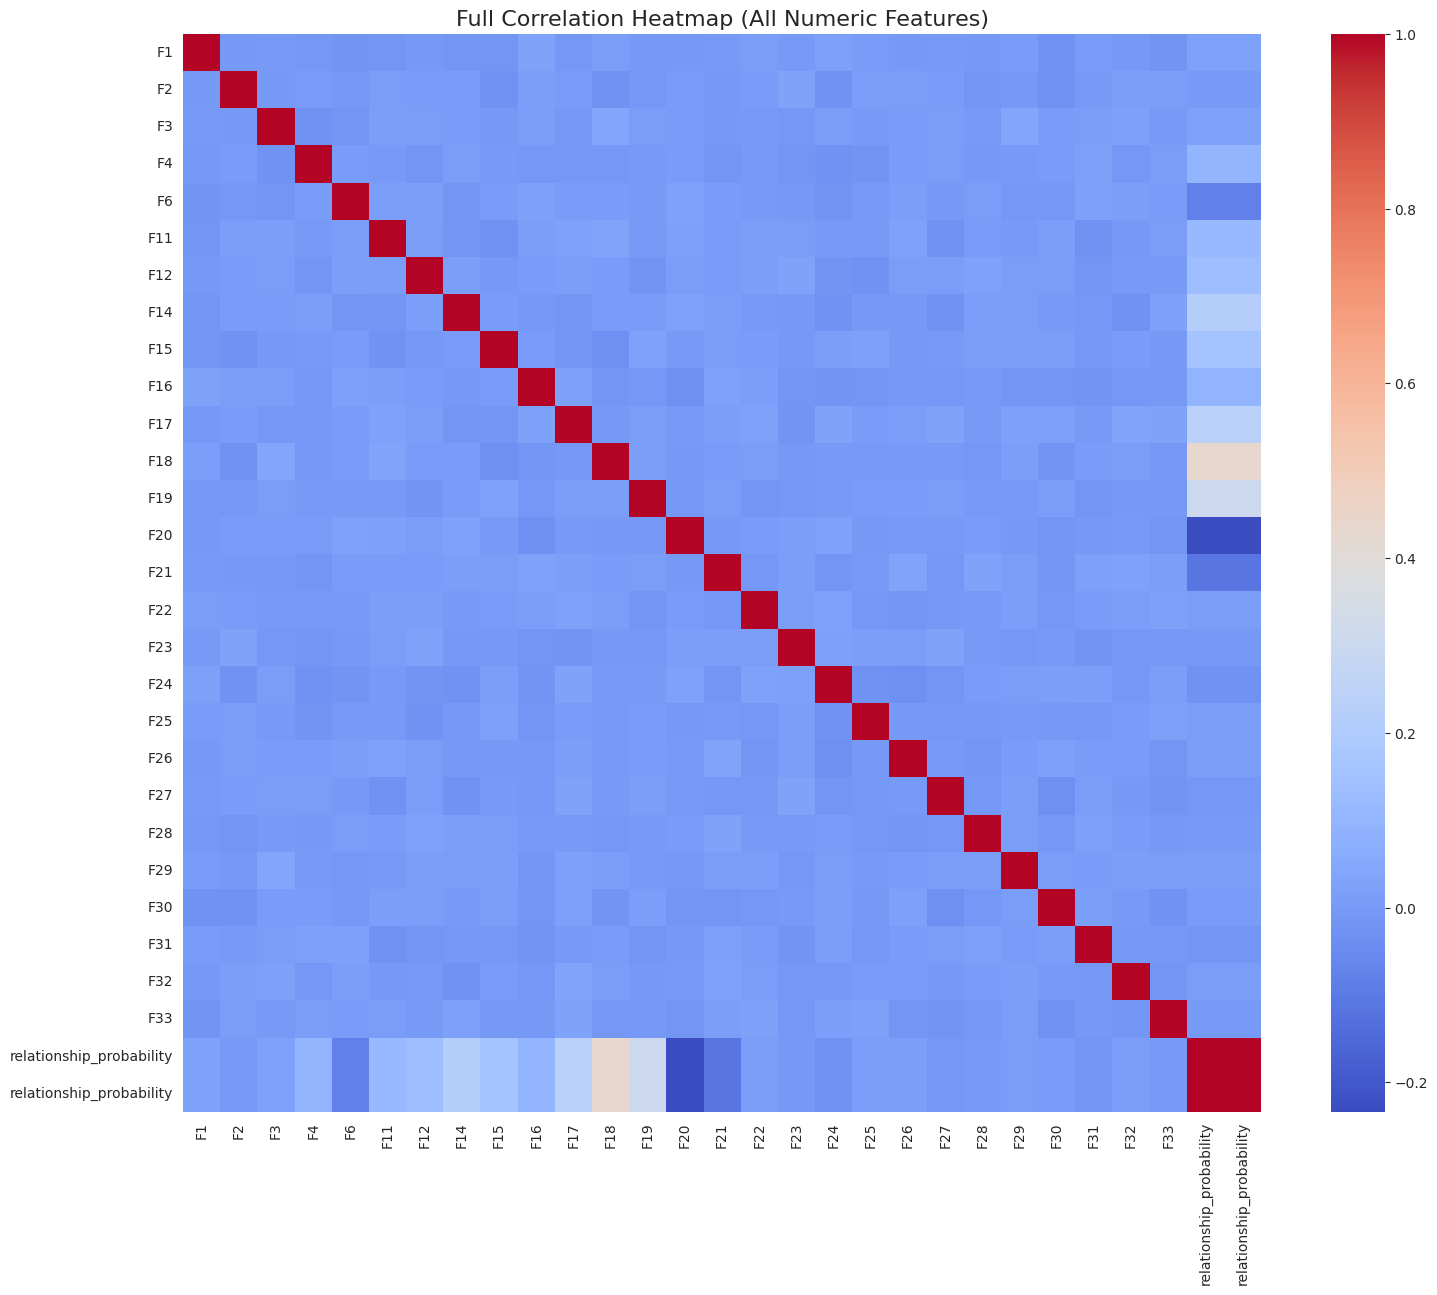

In [ ]:
plt.figure(figsize=(18,14))
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)
plt.title("Full Correlation Heatmap (All Numeric Features)", fontsize=16)
plt.show()


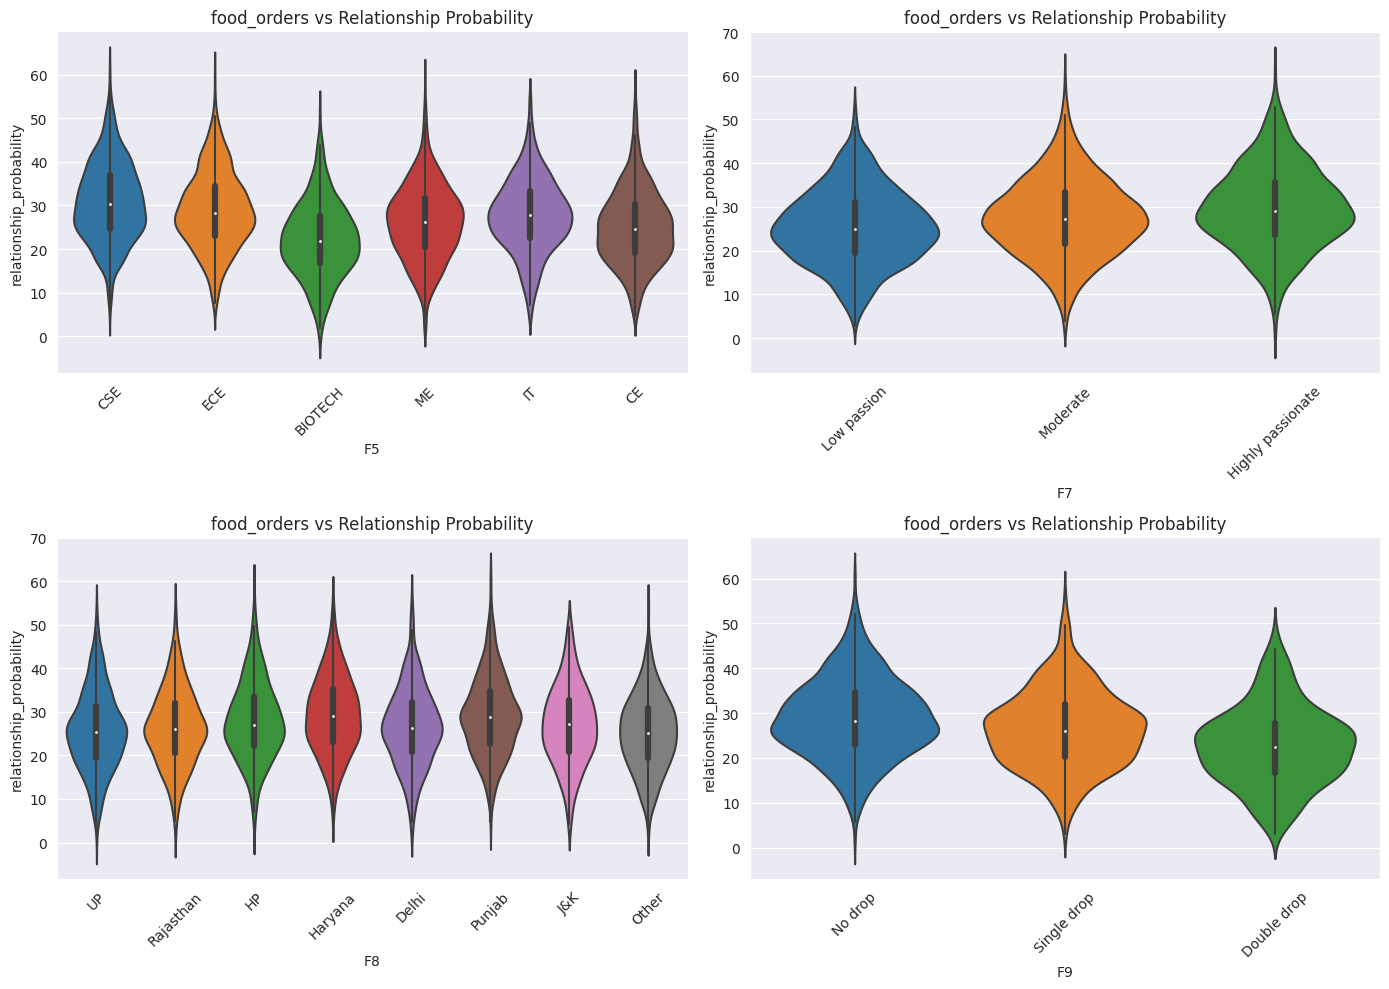

In [ ]:
cols = ['F5', 'F7', 'F8', 'F9']   # change if you want different ones
plt.figure(figsize=(14, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(data=df_train, x=col, y='relationship_probability')
    plt.title(f"{real_name} vs Relationship Probability")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

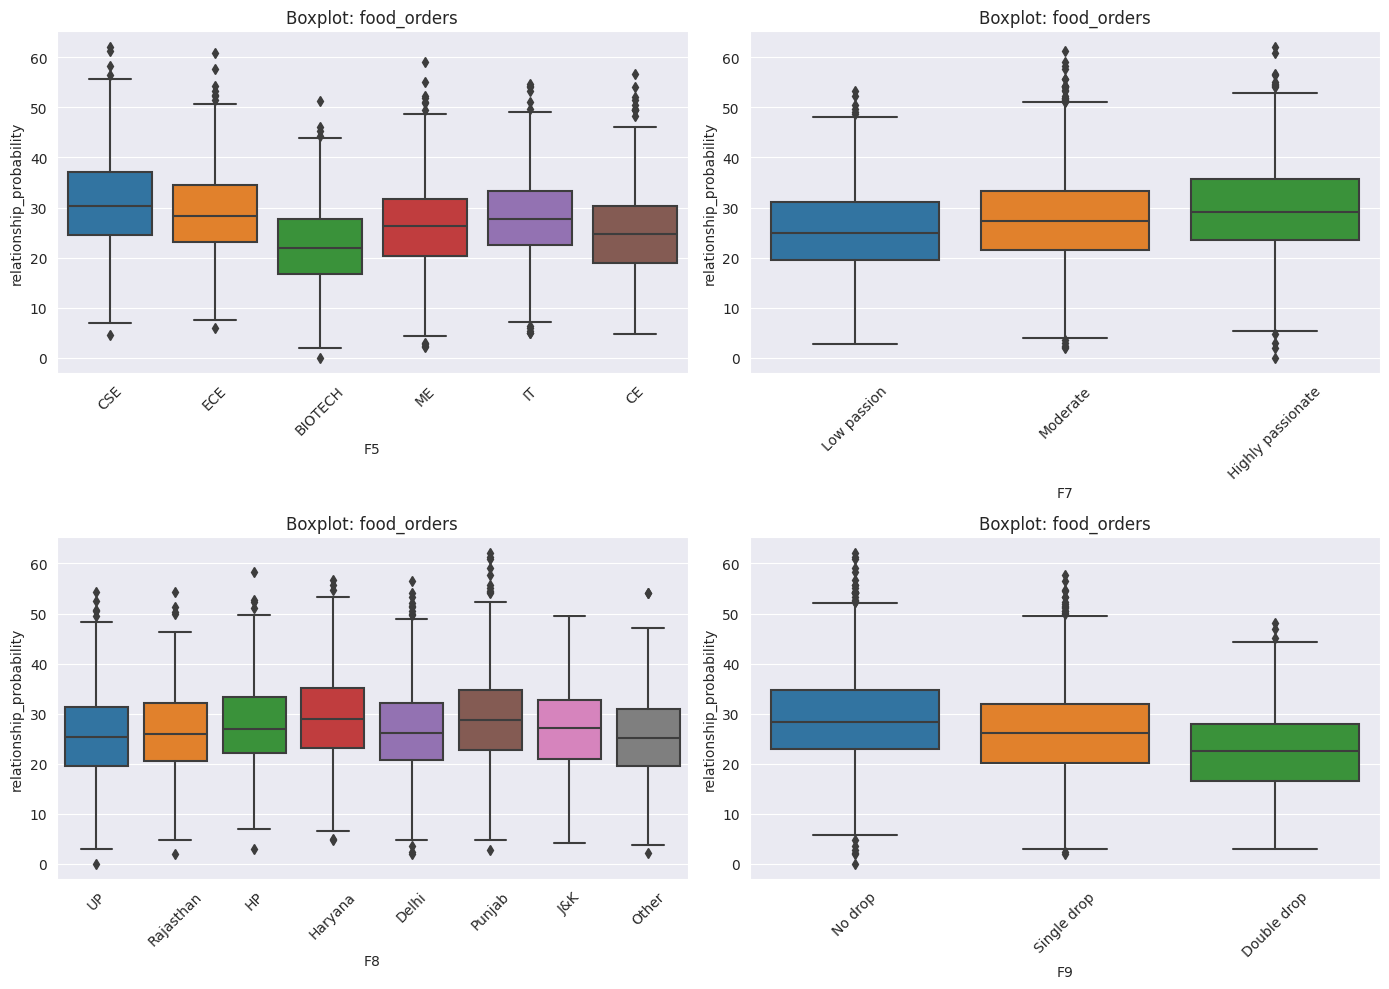

In [ ]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['F5','F7','F8','F9'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_train, x=col, y='relationship_probability')
    plt.title(f"Boxplot: {real_name}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_train_model = df_train.drop(columns=['ID'])
df_test_model = df_test.drop(columns=['ID'])
x_train = df_train_model.drop(columns=['relationship_probability'])
y_train = df_train_model['relationship_probability']
x_test = df_test_model

In [ ]:
Categorical_Cols = x_train.select_dtypes(include=['object']).columns.tolist()
Numeric_Cols = x_train.select_dtypes(include=['int64','float64']).columns.tolist()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in Categorical_Cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[Numeric_Cols] = scaler.fit_transform(x_train[Numeric_Cols])
x_test[Numeric_Cols] = scaler.transform(x_test[Numeric_Cols])

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_tr, y_tr)
lr_pred = lr.predict(X_val)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_tr, y_tr)
rf_pred = rf.predict(X_val)


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_tr, y_tr)
xgb_pred = xgb.predict(X_val)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(name, y_true, y_pred):
    print(f"\n{name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("R²  :", r2_score(y_true, y_pred))

evaluate("Linear Regression", y_val, lr_pred)
evaluate("Random Forest", y_val, rf_pred)
evaluate("XGBoost", y_val, xgb_pred)


Linear Regression
RMSE: 6.055465313066857
MAE : 4.846869184566442
R²  : 0.5647367058894038

Random Forest
RMSE: 6.098896658681276
MAE : 4.80338050668721
R²  : 0.5584706761153508

XGBoost
RMSE: 5.280099183664774
MAE : 4.237287742025699
R²  : 0.6690661710447203


In [ ]:
test_pred = xgb.predict(x_test)

submission = pd.DataFrame({
    'ID': df_test['ID'],
    'relationship_probability': test_pred})

submission.to_csv("submission.csv", index=False)

In [ ]:
submission.head()

,ID,relationship_probability
0,1,24.971901
1,2,39.244747
2,3,39.107311
3,4,13.379331
4,5,21.669456


In [ ]:
print(f"Submission shape: {submission.shape}")

Submission shape: (2000, 2)


✅ 
**What I Did in This Project**

1.Loaded and explored the training and test datasets

2.Identified numeric and categorical features

3.Performed EDA using violin plots, boxplots, and heatmaps

4.Preprocessed data: removed ID, encoded categorical columns, scaled numeric columns

5.Split the dataset into training and validation sets

6.Trained basic ML models: Linear Regression, Random Forest, and XGBoost

7.Evaluated models using RMSE, MAE, and R²

8.Selected the model with the best validation performance

9.Generated predictions on the test data

10.Created a submission.csv file in the required Kaggle format

In [ ]:
import joblib
joblib.dump(xgb, "relationship_predictor.pkl")

['relationship_predictor.pkl']